In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn.functional as F
sns.set()
import torch

In [126]:
def plot_mean_std(percentages, accuracies, label, log=False, color="blue"):
    mean = np.mean(accuracies,axis=0)
    std  = np.std(accuracies,axis=0)
   
    plt.plot(percentages,mean, label=label, color=color)
    plt.fill_between(percentages, mean + std, mean - std, facecolor=color, alpha=0.5)
    if log: plt.xscale('log')
    plt.legend()

In [127]:
def treat(arr):
    l = []
    k = []
    for i in range(arr.shape[0]):
        if arr[i]!=0:
            l.append(i)
    return l

In [128]:
mc_bald= np.load('mc_results/mc_bald.npy')

In [129]:
l = treat(mc_bald[0])

In [130]:
vogn_bald= np.load('vogn_results/vogn_bald.npy')[:,l]
vogn_ent= np.load('vogn_results/vogn_ent.npy')[:,l]
vogn_f= np.load('vogn_results/vogn_f.npy')[:,l]
vogn_std= np.load('vogn_results/vogn_std.npy')[:,l]
vogn_var= np.load('vogn_results/vogn_var.npy')[:,l]

In [131]:
random = np.load('new_random.npy')[:,l]
random.shape

(10, 262)

In [132]:
mc_bald= np.load('mc_results/mc_bald.npy')[:,l]
mc_ent= np.load('mc_results/mc_ent.npy')[:,l]
mc_f= np.load('mc_results/mc_f.npy')[:,l]
mc_std= np.load('mc_results/mc_std.npy')[:,l]
mc_var= np.load('mc_results/mc_var.npy')[:,l]

In [133]:
mc_grad=np.load('mc_grad.npy')[:,l]

In [134]:
mc_alt= np.load('mc_alt.npy')[:,l]

In [135]:
batch_size_sample = np.ones(261).astype(int)
for i in range(100):
    batch_size_sample[i+110]=3
for i in range(60):
    batch_size_sample[i+200]=5

In [136]:
nnn = np.ones(262)
for i in range(261):
    nnn[i+1] = nnn[i] + batch_size_sample[i]

<Figure size 432x288 with 0 Axes>

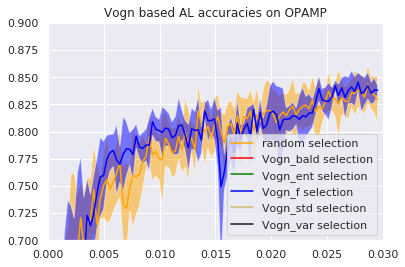

In [138]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.03), ylim=(0.7, 0.9), autoscale_on=False,title='Vogn based AL accuracies on OPAMP')
plot_mean_std(nnn[:101]/3420,random[:,:101],'random selection',color='orange')
plot_mean_std(nnn[:101]/3420,vogn_bald[:,:101],'Vogn_bald selection',color='red')
plot_mean_std(nnn[:101]/3420,vogn_ent[:,:101],'Vogn_ent selection',color='green')

plot_mean_std(nnn[:101]/3420,vogn_f[:,:101],'Vogn_f selection',color='blue')
plot_mean_std(nnn[:101]/3420,vogn_std[:,:101],'Vogn_std selection',color='y')
plot_mean_std(nnn[:101]/3420,vogn_var[:,:101],'Vogn_var selection',color='k')
plt.savefig('graph_vogn_02.png')

<Figure size 432x288 with 0 Axes>

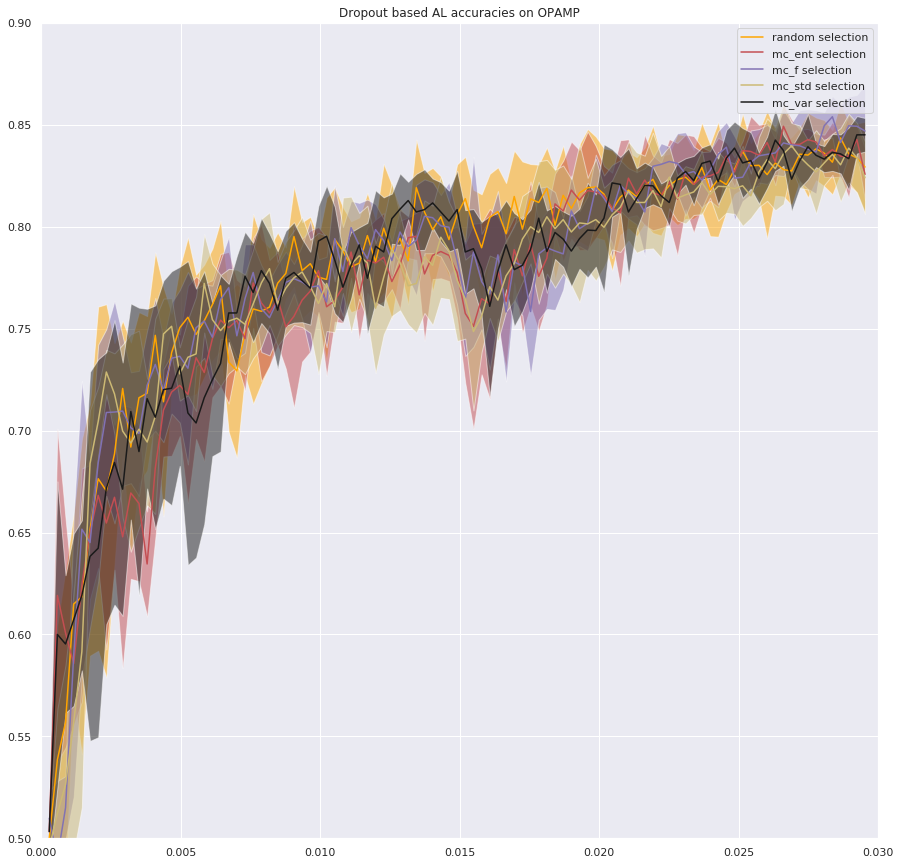

In [140]:
plt.clf()
figsrc, axsrc = plt.subplots(figsize=(15,15))
axsrc.set(xlim=(0, 0.03), ylim=(0.5, 0.9), autoscale_on=False,title='Dropout based AL accuracies on OPAMP')
plot_mean_std(nnn[:101]/3420,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn[:101]/3420,mc_bald[:,:101],'mc_bald selection',color='blue')
plot_mean_std(nnn[:101]/3420,mc_ent[:,:101],'mc_ent selection',color='r')
plot_mean_std(nnn[:101]/3420,mc_f[:,:101],'mc_f selection',color='m')
#plot_mean_std(nnn[:101]/3420,mc_grad[:,:101],'mc_grad selection',color='blue')
#plt.plot(nnn[:101]/3420,mc_alt[0][:101])
plot_mean_std(nnn[:101]/3420,mc_std[:,:101],'mc_std selection',color='y')
plot_mean_std(nnn[:101]/3420,mc_var[:,:101],'mc_var selection',color='k')
plt.savefig('graph_mc_02.png')

In [120]:
mc_ent[:,48:53]

array([[0.8037383 , 0.80607474, 0.7932243 , 0.7686916 , 0.7932243 ],
       [0.7932243 , 0.77453274, 0.74065423, 0.75116825, 0.69392526],
       [0.76635516, 0.77102804, 0.807243  , 0.8130841 , 0.81542057],
       [0.7955608 , 0.7920561 , 0.77102804, 0.7464953 , 0.760514  ],
       [0.7803738 , 0.78621495, 0.7757009 , 0.7079439 , 0.692757  ]],
      dtype=float32)

In [121]:
nnn[51]/3420

0.0152046783625731

<Figure size 432x288 with 0 Axes>

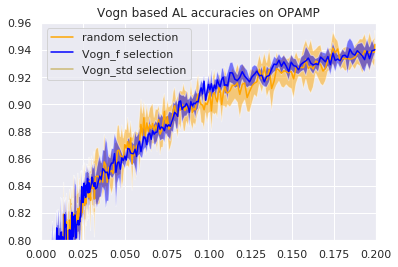

In [144]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.2), ylim=(0.8, 0.96), autoscale_on=False,title='Vogn based AL accuracies on OPAMP')
plot_mean_std(nnn/3420,random,'random selection',color='orange')
#plot_mean_std(nnn/3420,vogn_bald,'Vogn_bald selection',color='r')
#plot_mean_std(nnn/3420,vogn_ent,'Vogn_ent selection',color='r')
plot_mean_std(nnn/3420,vogn_f,'Vogn_f selection',color='blue')
plot_mean_std(nnn/3420,vogn_std,'Vogn_std selection',color='y')
#plot_mean_std(nnn/3420,vogn_var,'Vogn_var selection',color='k')
plt.savefig('graph_vogn.png')

In [123]:
from matplotlib.pyplot import figure

<Figure size 432x288 with 0 Axes>

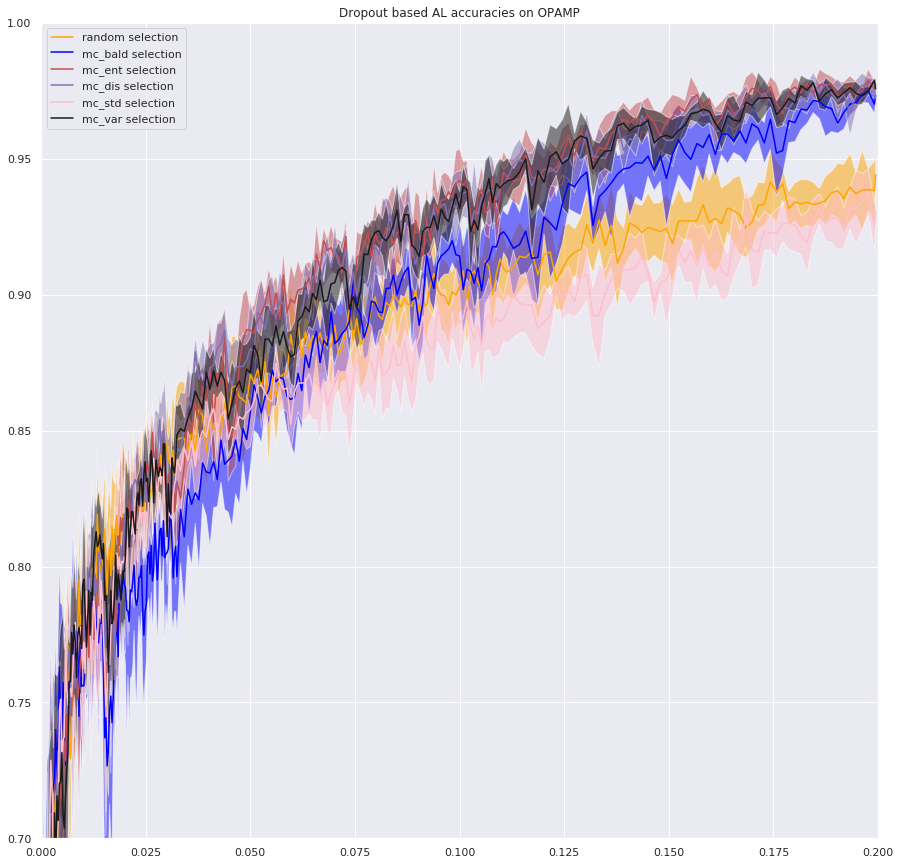

In [142]:
plt.clf()
figsrc, axsrc = plt.subplots(figsize=(15,15))
axsrc.set(xlim=(0, 0.2), ylim=(0.7, 1), autoscale_on=False,title='Dropout based AL accuracies on OPAMP')
plot_mean_std(nnn/3420,random,'random selection',color='orange')
plot_mean_std(nnn/3420,mc_bald,'mc_bald selection',color='blue')
plot_mean_std(nnn/3420,mc_ent,'mc_ent selection',color='r')
plot_mean_std(nnn/3420,mc_f,'mc_dis selection',color='m')
plot_mean_std(nnn/3420,mc_std,'mc_std selection',color='pink')
plot_mean_std(nnn/3420,mc_var,'mc_var selection',color='k')


#plot_mean_std(nnn/3420,mc_grad,'mc_grad selection',color='blue')

#plt.plot(nnn/3420,mc_alt[0],color='r')


#plot_mean_std(nnn/3420,mc_std,'mc_std selection',color='y')
#plot_mean_std(nnn/3420,mc_var,'mc_var selection',color='k')
plt.savefig('graph_mc.png')

In [46]:
a = np.load('mc_alt.npy')[0]


In [52]:
callable(f)

True

In [51]:
def f(x):
    return x

In [49]:
np.load('accuracies_opamp.npy')

array([0.        , 0.49883178, 0.6203271 , 0.61214954, 0.52219623,
       0.47079438, 0.6705608 , 0.6787383 , 0.49415886, 0.6179907 ,
       0.69509345, 0.55841124, 0.73247665, 0.739486  , 0.6880841 ,
       0.6507009 , 0.6857477 , 0.6682243 , 0.7126168 , 0.80023366,
       0.8107477 , 0.7686916 , 0.8329439 , 0.77803737, 0.7581776 ,
       0.7581776 , 0.75233644, 0.76285046, 0.7698598 , 0.7768692 ,
       0.7803738 , 0.75934577, 0.7651869 , 0.7792056 , 0.78271025,
       0.7768692 , 0.77803737, 0.79088783, 0.78971964, 0.7873832 ,
       0.78621495, 0.78971964, 0.7803738 , 0.7873832 , 0.7943925 ,
       0.807243  , 0.80607474, 0.8037383 , 0.81658876, 0.8317757 ,
       0.80841124, 0.80957943, 0.80490655, 0.8130841 , 0.82359815,
       0.8306075 , 0.8271028 , 0.8306075 , 0.81892526, 0.8457944 ,
       0.84696263, 0.84228975, 0.8329439 , 0.8364486 , 0.85864484,
       0.83995324, 0.85864484, 0.85280377, 0.8492991 , 0.8457944 ,
       0.83528036, 0.8563084 , 0.8492991 , 0.8633177 , 0.85630

In [48]:
np.save('accuracies_opamp.npy', a)

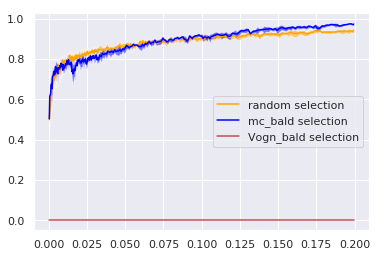

In [147]:
plt.clf()
plot_mean_std(nnn/3420,random,'random selection',color='orange')
plot_mean_std(nnn/3420,mc_bald,'mc_bald selection',color='blue')
plot_mean_std(nnn/3420,vogn_bald,'Vogn_bald selection',color='r')

<Figure size 432x288 with 0 Axes>

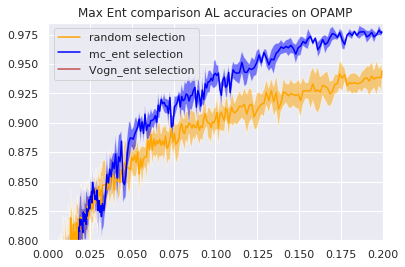

In [148]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.2), ylim=(0.8, 0.985), autoscale_on=False,title='Max Ent comparison AL accuracies on OPAMP')
plot_mean_std(nnn/3420,random,'random selection',color='orange')
plot_mean_std(nnn/3420,mc_ent,'mc_ent selection',color='blue')
plot_mean_std(nnn/3420,vogn_ent,'Vogn_ent selection',color='r')

<Figure size 432x288 with 0 Axes>

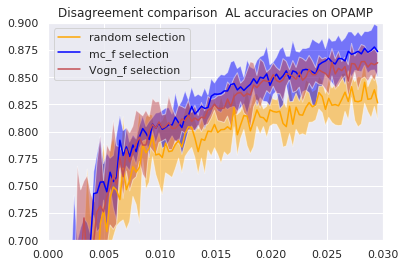

In [104]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.03), ylim=(0.7, 0.9), autoscale_on=False,title='Disagreement comparison  AL accuracies on OPAMP')
plot_mean_std(nnn[:101]/3420,random[:,:101],'random selection',color='orange')
plot_mean_std(nnn[:101]/3420,mc_f[:,:101],'mc_f selection',color='blue')
plot_mean_std(nnn[:101]/3420,vogn_f[:,:101],'Vogn_f selection',color='r')

In [ ]:
plt.clf()
plot_mean_std(np.arange(684)/3420,random,'random selection',color='orange')
plot_mean_std(nnn/3420,mc_std,'mc_std selection',color='blue')
plot_mean_std(nnn/3420,vogn_std,'Vogn_std selection',color='r')

In [ ]:
plt.clf()
plot_mean_std(np.arange(684)/3420,random,'random selection',color='orange')
plot_mean_std(nnn/3420,mc_var,'mc_var selection',color='blue')
plot_mean_std(nnn/3420,vogn_var,'Vogn_var selection',color='r')